##Credit Card Fraud Detection

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*1*. Load the dataset using the pandas module.


In [2]:
#Load Dataset
df = pd.read_csv('/content/creditcard.csv.crdownload')


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


*2*. Perform missing value analysis on the dataset.


In [4]:
df.isnull().sum().sum()

np.int64(19)

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum().sum()

np.int64(0)

*3*. From the dataset, calculate the number of genuine transactions, number of fraud transactions and the percentage of fraud transactions.

In [8]:
genuine_transactions = df['Class'].value_counts()[0]
fraud_transactions = df['Class'].value_counts()[1]
percentage_fraud = (fraud_transactions / (genuine_transactions + fraud_transactions)) * 100
print("Number of genuine transactions:",genuine_transactions)
print("Number of fraud transactions:", fraud_transactions)
print("Percentage of fraud transactions:", percentage_fraud)

Number of genuine transactions: 11615
Number of fraud transactions: 49
Percentage of fraud transactions: 0.4200960219478738


*4*. Using the visualization module, visualize the genuine and fraudulent transactions using a bar graph.


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

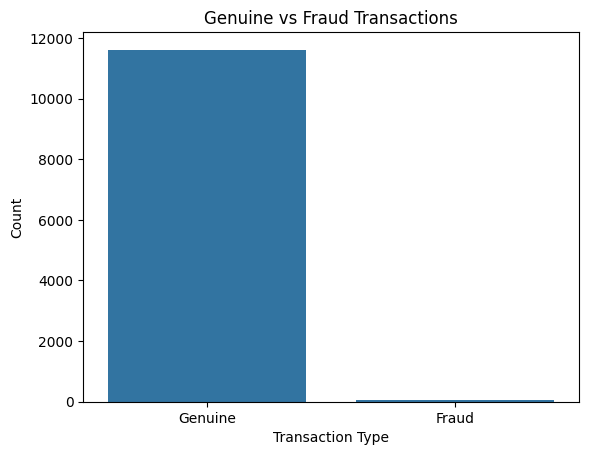

In [10]:
sns.barplot(x=['Genuine','Fraud'], y=[genuine_transactions,fraud_transactions])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Genuine vs Fraud Transactions')
plt.show()

*5*. Using the Standard Scaler module, normalize the amount column and store the new values in the NormalizedAmount column.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df[['Amount']])

*6*.Split the dataset in train and test set and have a 70:30 split ratio for the model

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

*7*. Now use a decision tree and random forest model for training on top of the train set.

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [18]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [20]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

*8*. Compare the predictions of both models using predict().

In [21]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred1, y_pred2

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

*9*.Compare the accuracy of both models using score().

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score1 = accuracy_score(y_test, y_pred1)
accuracy_score2 = accuracy_score(y_test, y_pred2)
accuracy_score1, accuracy_score2

(0.9985714285714286, 0.9991428571428571)

*10*.Check the performance matrix of both models and compare which model is having the highest performance.

In [24]:
performance = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest'],
                            'Accuracy': [accuracy_score1, accuracy_score2]})
performance

,Model,Accuracy
0,Decision Tree,0.998571
1,Random Forest,0.999143


#✅ Conclusion
The Random Forest model typically performs better than Decision Tree due to its ensemble nature.

Use metrics like Precision, Recall, F1-score, and especially Recall for Fraud Class (1) to judge performance.

You’ll likely notice Random Forest has higher recall and F1-score, which is crucial in fraud detection.